In [94]:
import pandas as pd

monsters = pd.read_csv("monsters.csv",index_col="sifra", encoding="utf-8")
spells_and_traps = pd.read_csv("spell_trap.csv", index_col="sifra")

# Predstavitev podatkov

Tu je 10 pošasti z najvišjim ATK.

In [95]:
napadalni = monsters[["ime", "ATK", "DEF", "level", "summon condition", "tipi"]].sort_values("ATK", ascending=False)
napadalni.head(10)

,ime,ATK,DEF,level,summon condition,tipi
sifra,,,,,,
58931850,Dragon Master Lords,5000.0,5000.0,12.0,2 Level 12 monsters,"Effect Monster,Dragon"
66523544,Superdimensional Robot Galaxy Destroyer,5000.0,2000.0,10.0,3 Level 10 monsters,"Effect Monster,Machine"
99267150,Five-Headed Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
37115575,Malefic Truth Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
87460579,Flower Cardian Lightflare,5000.0,0.0,10.0,1 Tuner + 4 non-Tuner monsters,"Effect Monster,Warrior"
56863746,Drytron Meteonis DA Draconids,5000.0,5000.0,12.0,NaN,"Effect Monster,Machine"
12381100,Dragon Master Magia,5000.0,4000.0,12.0,"""Blue-Eyes Ultimate Dragon"" or 3 ""Blue-Eyes"" m...","Effect Monster,Dragon"
23288411,Mementoal Tecuhtlica - Combined Creation,5000.0,5000.0,11.0,NaN,"Effect Monster,Wyrm"
37542782,Cyberdark End Dragon,5000.0,3800.0,12.0,"""Cyberdark Dragon"" + ""Cyber End Dragon""","Effect Monster,Machine"


Tu je 10 pošasti z najvišjim DEF.

In [96]:
defenzivni = monsters[["ime", "ATK", "DEF", "level", "summon condition", "tipi"]].sort_values("DEF", ascending=False)
defenzivni.head(10)

,ime,ATK,DEF,level,summon condition,tipi
sifra,,,,,,
81677154,Mementotlan Tatsunootoshigo,1350.0,16000.0,5.0,NaN,"Effect Monster,Beast"
17745969,Super Vehicroid - Mobile Base,0.0,5000.0,10.0,"1 ""roid"" Fusion Monster + 1 ""roid"" monster","Effect Monster,Machine"
37115575,Malefic Truth Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
56863746,Drytron Meteonis DA Draconids,5000.0,5000.0,12.0,NaN,"Effect Monster,Machine"
99267150,Five-Headed Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
23288411,Mementoal Tecuhtlica - Combined Creation,5000.0,5000.0,11.0,NaN,"Effect Monster,Wyrm"
58931850,Dragon Master Lords,5000.0,5000.0,12.0,2 Level 12 monsters,"Effect Monster,Dragon"
76821171,"Duralume, Vaalmonican Heathen Hallow",2500.0,5000.0,NaN,NaN,"Effect Monster,Fairy"
17775525,Superheavy Samurai Steam Train King,2000.0,4800.0,12.0,"1 ""Superheavy Samurai"" Tuner + 2+ non-Tuner ""S...","Effect Monster,Machine"


Spodnji graf prikazuje povprečen ATK v odvisnosti od levela karte.

<Axes: xlabel='level', ylabel='ATK'>

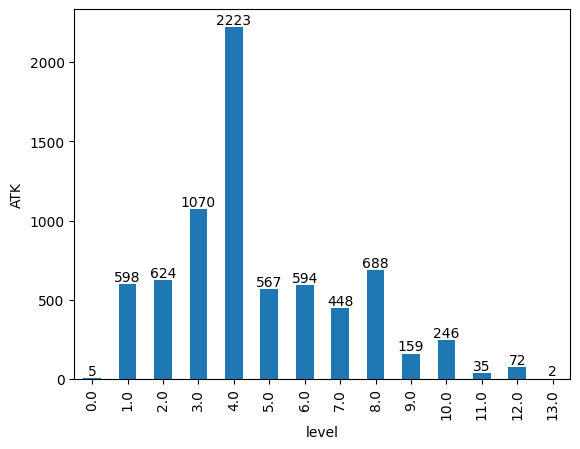

In [97]:
graf = monsters.groupby("level")["ime"].count().plot.bar(ylabel="ATK")
labels = graf.bar_label(graf.containers[0])
graf

Manjša tabela kjer je dodan stolpec z povprečjem ATK in DEF.

In [98]:
monsters["moč"] = (monsters["ATK"] + monsters["DEF"]) / 2
monsters[["ime", "ATK", "DEF", "moč"]]

,ime,ATK,DEF,moč
sifra,,,,
14261867,8-Claws Scorpion,300.0,200.0,250.0
4731783,"A Bao A Qu, the Lightless Shadow",2800.0,300.0,1550.0
51351302,A Man with Wdjat,1600.0,1600.0,1600.0
1966438,Abominable Unchained Soul,3000.0,1500.0,2250.0
60990740,Absolute King Back Jack,0.0,0.0,0.0
...,...,...,...,...
23740893,Yosenju Kodam,0.0,0.0,0.0
49249907,Yosenju Magat,2000.0,100.0,1050.0
25244515,Yosenju Tsujik,1000.0,0.0,500.0


Graf prikazuje kako imajo različne pošasti različno moč glede na level.

<Axes: xlabel='level', ylabel='moč'>

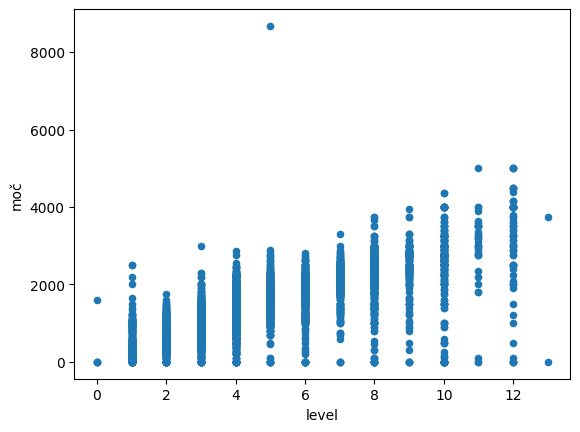

In [99]:
monsters.plot.scatter(x="level", y="moč")

Graf prikazuje razmerje med ATK in DEF pri različnih pošastih.

<Axes: title={'center': 'Razmerje med ATK in DEF'}, xlabel='ATK', ylabel='DEF'>

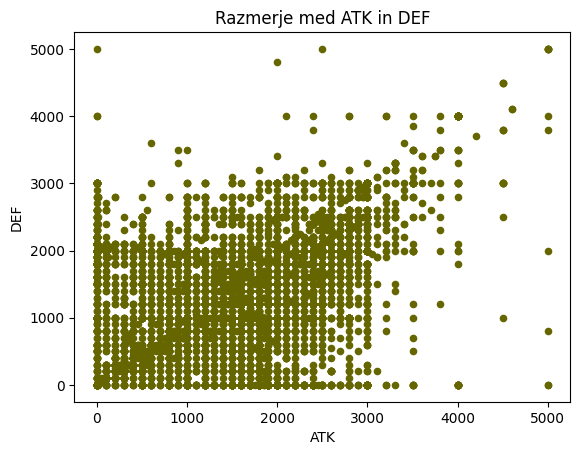

In [100]:
pošasti = monsters[monsters["DEF"] < 10000]
#se veliko bolje vidi ker ima le 1 monster "DEF" 16 000
pošasti.plot.scatter(x="ATK", y="DEF", title="Razmerje med ATK in DEF", color="#666600")

Graf prikazuje povprečen ATK in DEF glede na level.

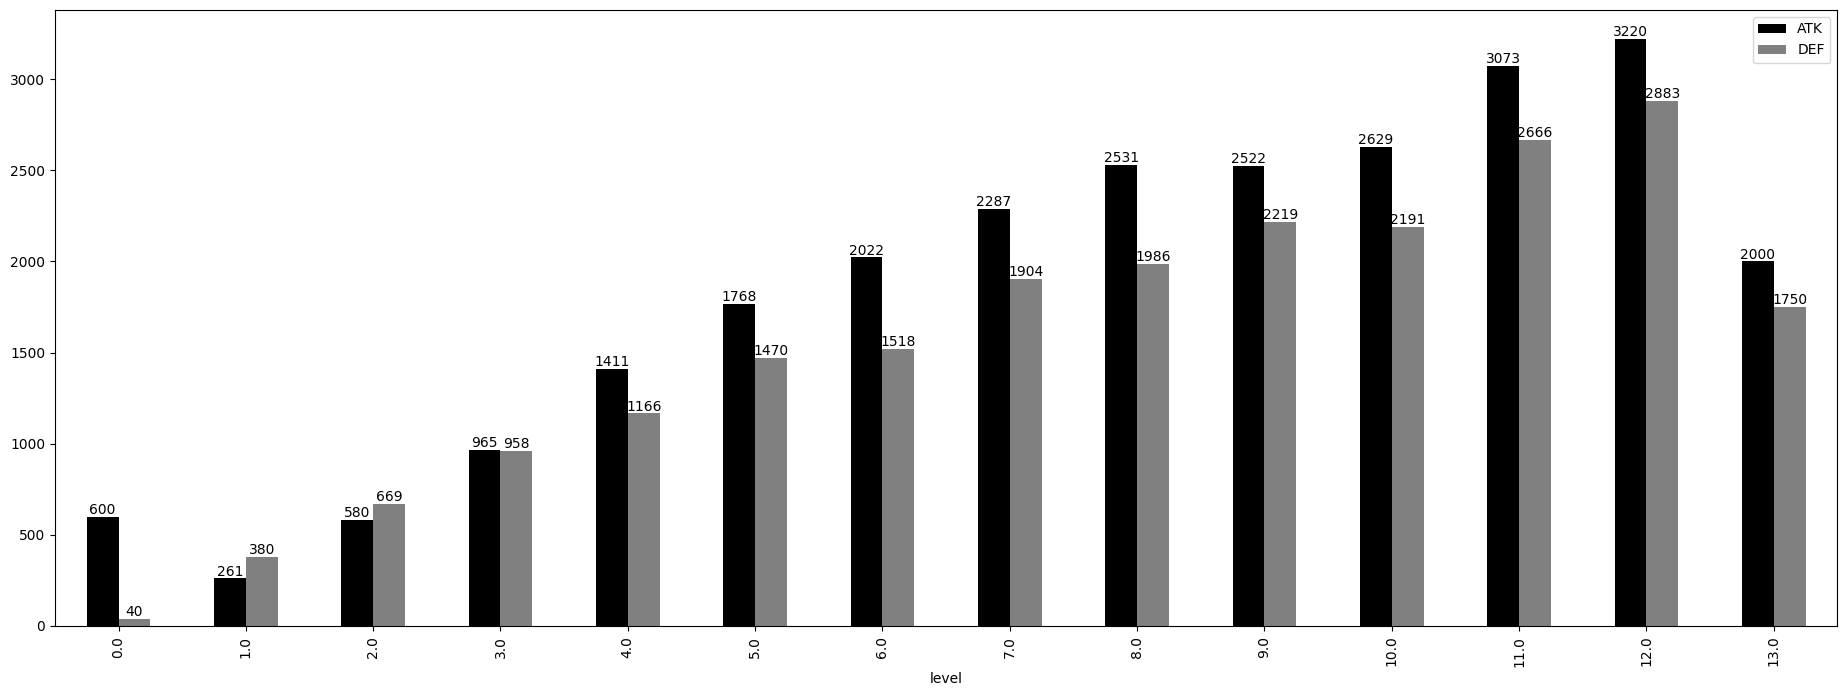

In [101]:
graf = monsters.groupby("level")[["ATK", "DEF"]].mean().plot.bar(figsize=(23, 8), color=("black", "gray"))
for container in graf.containers:
    graf.bar_label(container, fmt="%.0f")

Graf prikazuje koliko kart je katerega tipa med uroki in pastmi.

<Axes: ylabel='ime'>

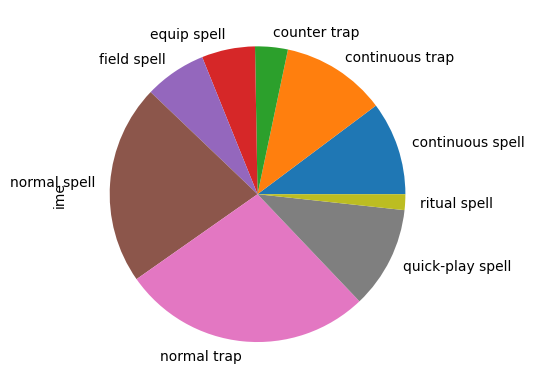

In [102]:
graf = spells_and_traps.groupby("tip")["ime"].count().plot.pie()
graf

Tu so prikazane dolžine efektov pasti in urokov po tipih.

<Axes: xlabel='tip', ylabel='dolzina efekta'>

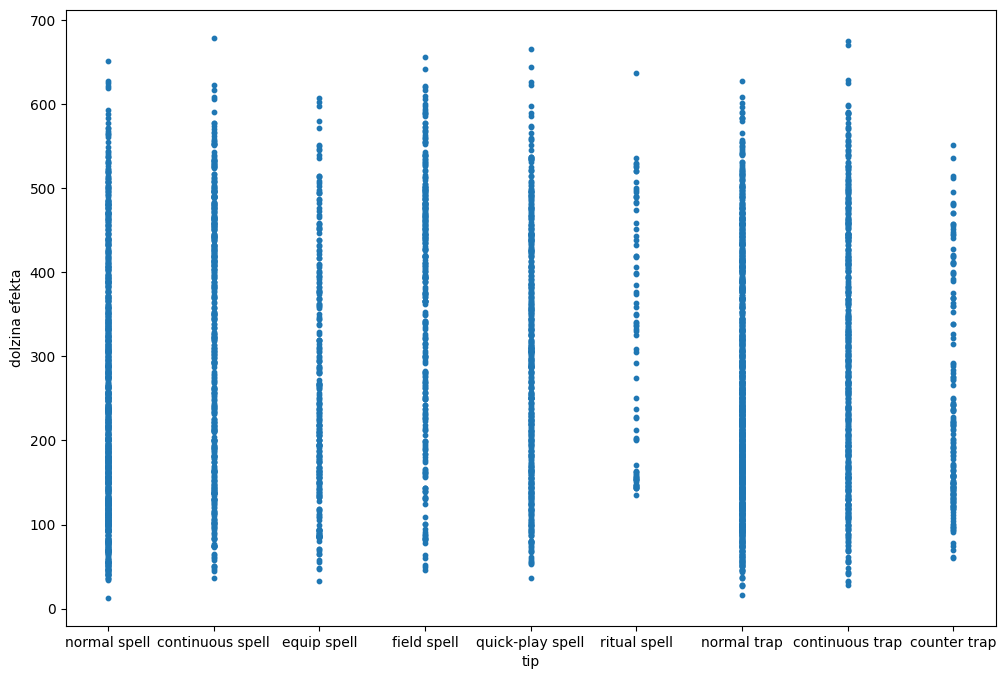

In [103]:
spells_and_traps["dolzina efekta"] = spells_and_traps["efekt"].str.len()
spells_and_traps.plot.scatter(x="tip", y="dolzina efekta", figsize=(12, 8), s=10)

5 urokov in pasti z najdaljšim efektom.

In [104]:
spells_and_traps[["ime", "dolzina efekta", "tip"]].sort_values("dolzina efekta", ascending=False).head(5)

,ime,dolzina efekta,tip
sifra,,,
58116537,Ancient Warriors Saga - Sun-Liu Alliance,679,continuous spell
84274024,Pendulum Dimension,675,continuous trap
61529473,True Draco Apocalypse,670,continuous trap
43476205,Rank-Up-Magic Revolution Force,666,quick-play spell
72283691,Golden Castle of Stromberg,656,field spell


In še dolžina efektov pošasti glede na moč.

<Axes: xlabel='dolzina efekta', ylabel='moč'>

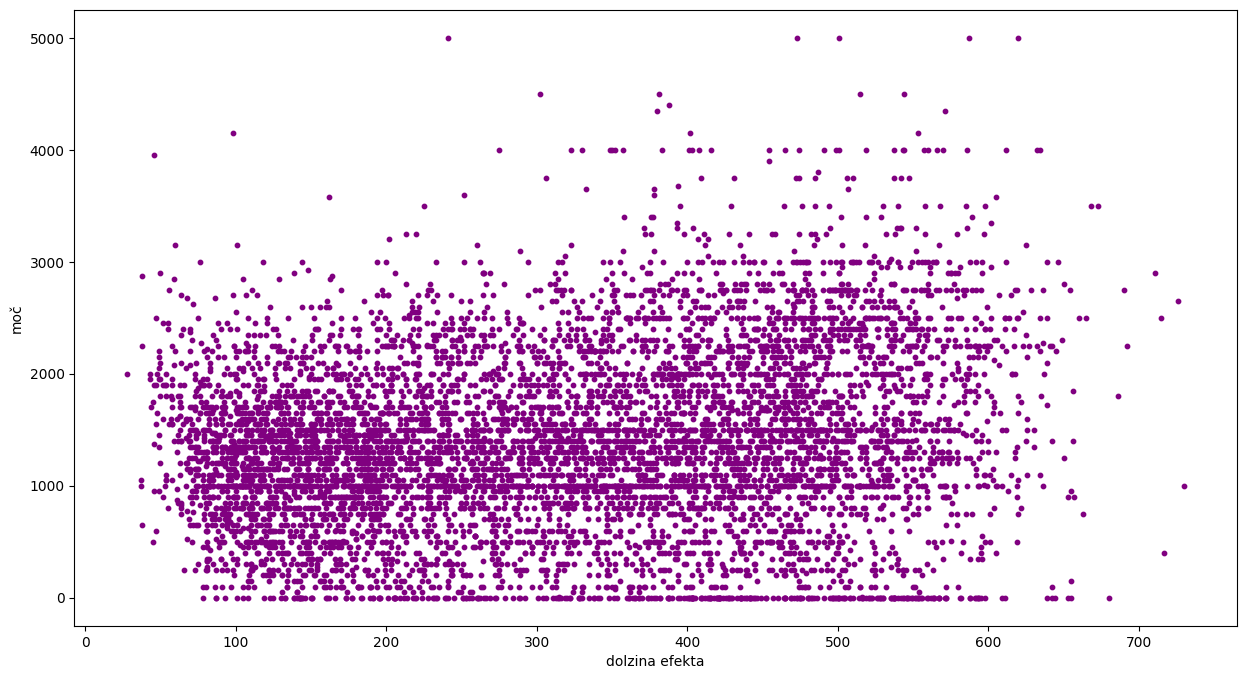

In [105]:
monsters["dolzina efekta"] = monsters["efekt"].str.len()
monsters[monsters["moč"] < 8000].plot.scatter(y="moč", x="dolzina efekta", figsize=(15, 8), color="purple", s=10)

Še 5 pošasti z najdaljšimi efekti.

In [107]:
monsters[["ime", "dolzina efekta", "level", "moč", "tipi"]].sort_values("dolzina efekta", ascending=False).head(5)

,ime,dolzina efekta,level,moč,tipi
sifra,,,,,
24639891,Gunkan Suship Shari,730,4.0,1000.0,"Normal Monster,Aqua"
27552504,"Beatrice, Lady of the Eternal",726,6.0,2650.0,"Effect Monster,Fairy"
71187462,Blackwing - Vata the Emblem of Wandering,717,2.0,400.0,"Effect Monster,Winged Beast"
82791472,Ancient Warriors - Rebellious Lu Feng,715,8.0,2500.0,"Effect Monster,Beast-Warrior"
42901635,Berserkion the Electromagna Warrior,711,8.0,2900.0,"Effect Monster,Rock"
